In [28]:
print("Hello World!")

Hello World!


In [29]:
import pandas as pd
import scanpy as sc
import numpy as np

In [37]:
pip install "scvi-tools[tutorials]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 8.1 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.8/686.8 kB 12.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 4.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 MB 6.9 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.1 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.2/330.2 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.7/223.7 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [40]:
pip install scvi-tools

  Using cached scvi_tools-1.1.2-py3-none-any.whl (380 kB)
  Using cached docrep-0.3.2-py3-none-any.whl
  Using cached flax-0.8.2-py3-none-any.whl (686 kB)
  Using cached jax-0.4.26-py3-none-any.whl (1.9 MB)
  Using cached jaxlib-0.4.26-cp311-cp311-macosx_10_14_x86_64.whl (83.6 MB)
  Using cached lightning-2.1.4-py3-none-any.whl (2.0 MB)
  Using cached ml_collections-0.1.1-py3-none-any.whl
  Using cached mudata-0.2.3-py3-none-any.whl (24 kB)
  Using cached numpyro-0.14.0-py3-none-any.whl (330 kB)
  Using cached optax-0.2.2-py3-none-any.whl (223 kB)
  Using cached pyro_ppl-1.9.0-py3-none-any.whl (745 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached torch-2.2.2-cp311-none-macosx_10_9_x86_64.whl (150.8 MB)
  Using cached torchmetrics-1.3.2-py3-none-any.whl (841 kB)
  Using cached ml_dtypes-0.4.0-cp311-cp311-macosx_10_9_universal2.whl (390 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached PyYAML-6.0.1-cp311-cp311-macosx_10_9_x86_64.whl (187 k

In [41]:
import scvi

In [30]:
def pp(h5_path):
    adata = sc.read_10x_h5(h5_path)
    adata.var_names_make_unique()
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    adata.var['mt'] = adata.var_names.str.startswith('mt-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, min_mean=0.125, max_mean=3, min_disp=0.5)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)
    sc.tl.leiden(adata, resolution=0.25)
    sc.tl.umap(adata)
    return adata

In [ ]:
data1 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432646_EC1_raw_gene_bc_matrices_h5.h5')
data2 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432645_EC2_raw_gene_bc_matrices_h5.h5')
data3 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432647_EC3_raw_gene_bc_matrices_h5.h5')
data4 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432648_EC4_raw_gene_bc_matrices_h5.h5')
data5 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432651_EC5_raw_gene_bc_matrices_h5.h5')
data6 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432649_EC6_raw_gene_bc_matrices_h5.h5')
data7 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432650_EC7_raw_gene_bc_matrices_h5.h5')
data8 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432653_EC8_raw_gene_bc_matrices_h5.h5')
data9 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432652_EC9_raw_gene_bc_matrices_h5.h5')
data10 = pp('/Users/ishaansareen/Downloads/GSE147528 RAW/GSM4432654_EC10_raw_gene_bc_matrices_h5.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Pyth

In [ ]:
data8

AnnData object with n_obs × n_vars = 11240 × 3632
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


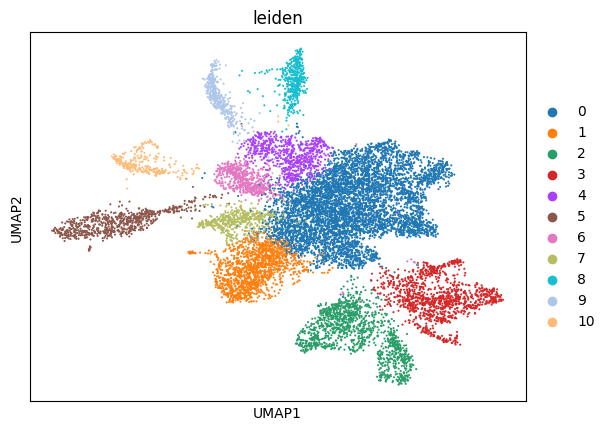

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


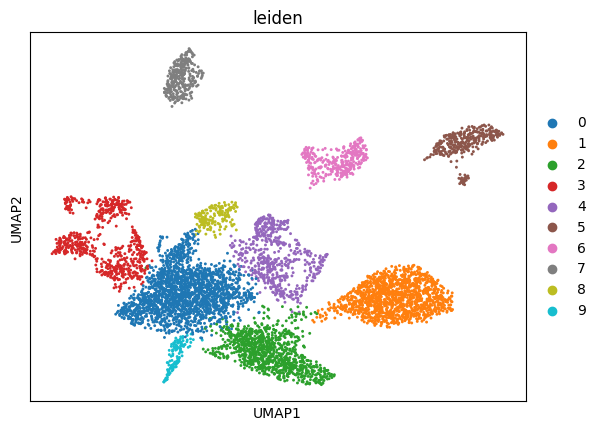

In [ ]:
sc.pl.umap(data1, color='leiden')
sc.pl.umap(data2, color='leiden')

In [ ]:
data1.obs['Braak_stage'] = 0

In [ ]:
data2.obs['Braak_stage'] = 0
data3.obs['Braak_stage'] = 0
data4.obs['Braak_stage'] = 2
data5.obs['Braak_stage'] = 2
data6.obs['Braak_stage'] = 2
data7.obs['Braak_stage'] = 2
data8.obs['Braak_stage'] = 6
data9.obs['Braak_stage'] = 6
data10.obs['Braak_stage'] = 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


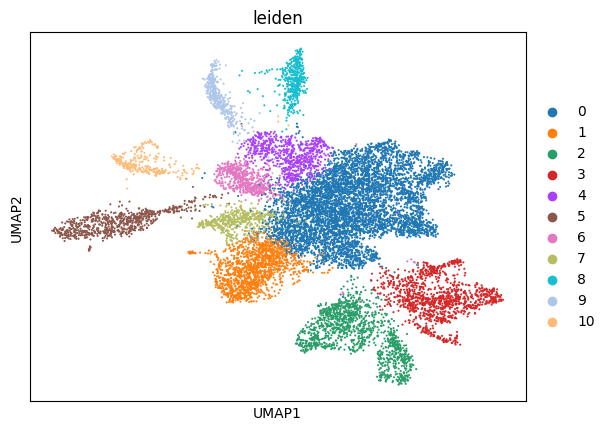

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


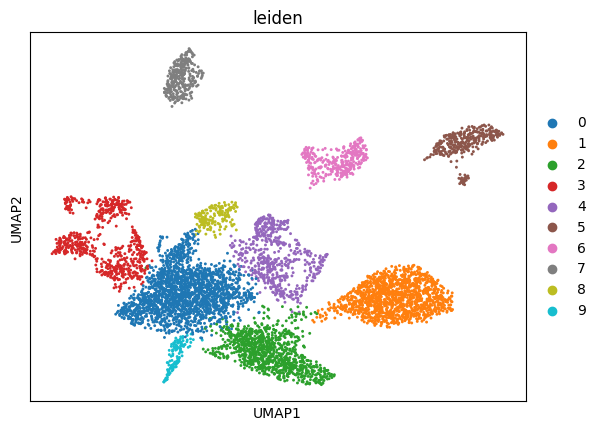

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


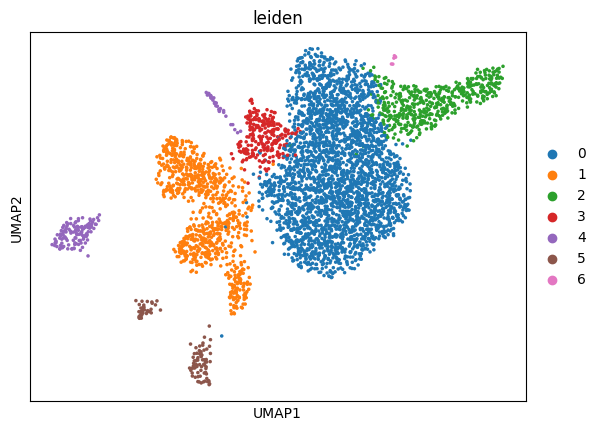

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


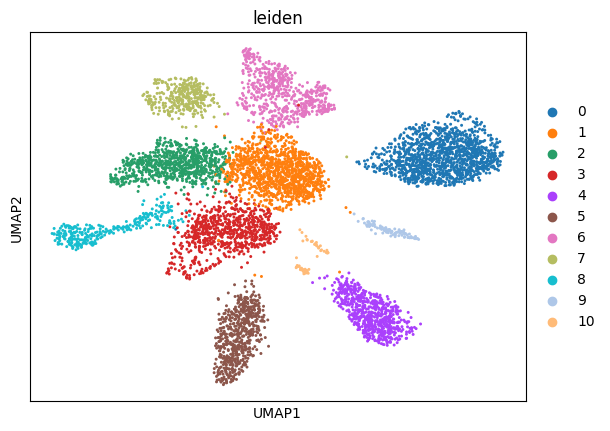

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


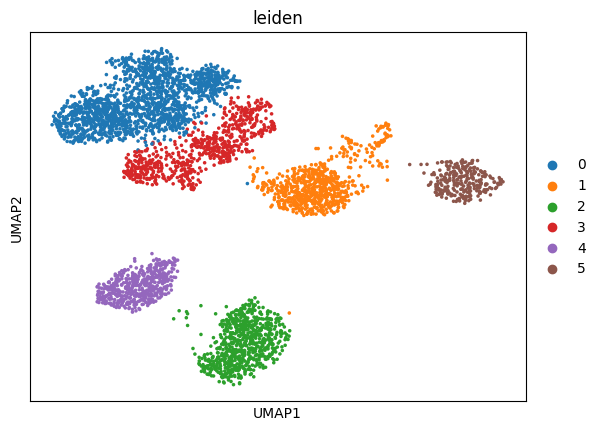

In [ ]:
sc.pl.umap(data1, color='leiden')
sc.pl.umap(data2, color='leiden')
sc.pl.umap(data3, color='leiden')
sc.pl.umap(data4, color='leiden')
sc.pl.umap(data5, color='leiden')

In [ ]:
results1 = 'results1.h5ad'
data1.write(results1)
results2 = 'results2.h5ad'
data2.write(results2)
results3 = 'results3.h5ad'
data3.write(results3)
results4 = 'results4.h5ad'
data4.write(results4)
results5 = 'results5.h5ad'
data5.write(results5)
results6 = 'results6.h5ad'
data6.write(results6)
results7 = 'results7.h5ad'
data7.write(results7)
results8 = 'results8.h5ad'
data8.write(results8)
results9 = 'results9.h5ad'
data9.write(results9)
results10 = 'results10.h5ad'
data10.write(results10)

In [32]:
superset1 = []
# files = os.listdir('/Users/ishaansareen/Downloads/GSE147528 RAW/')set1.append(data1)
superset1.append(data1)
superset1.append(data2)
superset1.append(data3)

superset2 = [] 
superset2.append(data4)
superset2.append(data5)
superset2.append(data6)
superset2.append(data7)

In [33]:
superset3 = []
superset3.append(data8)
superset3.append(data9)
superset3.append(data10)

In [34]:
supersetAdata1 = sc.concat(superset1, index_unique='_')
supersetAdata2 = sc.concat(superset2, index_unique='_')
supersetAdata3 = sc.concat(superset3, index_unique='_')

In [50]:
sc.pp.filter_genes(supersetAdata1, min_cells = 100)

supersetAdata1.layers['counts'] = supersetAdata1.X.copy()

scvi.model.SCVI.setup_anndata(supersetAdata1, layer = "counts")


model = scvi.model.SCVI(supersetAdata1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvi/data/fields/_base_field.py:64: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scvi/model/_scvi.py:155: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  library_log_means, library_log_vars = _init_library_size(


In [52]:
scvi.settings.dl_num_workers = 15
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Epoch 1/326:   0%|          | 0/326 [00:00<?, ?it/s]

ValueError: Expected parameter loc (Tensor of shape (128, 10)) of distribution Normal(loc: torch.Size([128, 10]), scale: torch.Size([128, 10])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], grad_fn=<AddmmBackward0>)